In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
h = titles
h.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [7]:
h=titles
h.head()
h.title.value_counts().head(10)


Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Kismet                  10
The Outsider            10
Honeymoon               10
Temptation              10
Love                    10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [8]:
h = titles

In [9]:
h[h.year//10*10==1930].year.value_counts().head(4)

1937    1189
1936    1130
1938    1117
1939    1056
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

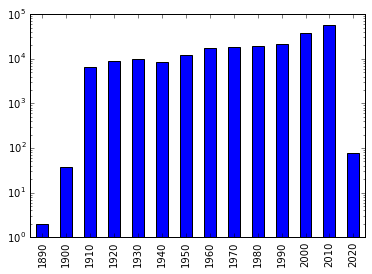

In [10]:
h.year#.value_counts().sort_index().plot()
t = h.year//10*10
t.value_counts().sort_index().plot(kind='bar',logy=True)

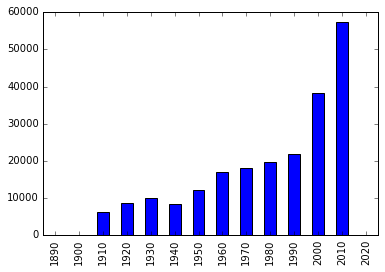

In [11]:
t.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

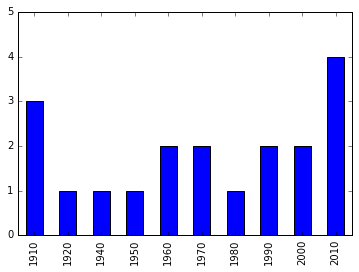

In [12]:
h = titles
t = h[h.title=='Hamlet'].year//10*10
t.value_counts().sort_index().plot(kind='bar',yticks=[0,1,2,3,4,5])

### Plot the number of "Rustler" characters in each decade of the history of film.

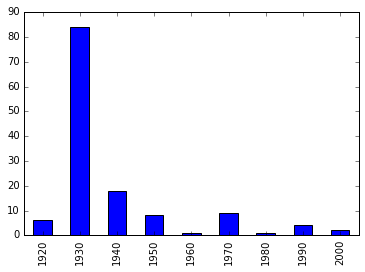

In [13]:
h = cast
t = h[h.character=='Rustler'].year//10*10
t.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

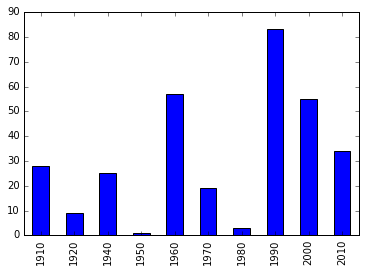

In [14]:
h = cast
t = h[h.title=='Hamlet'].year//10*10
t.value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [15]:
h=cast
h.head()
h[h.n<=6].character.value_counts().head(11)

Himself    1511
Anna       1086
Maria       992
Paul        873
David       820
Sam         790
Jack        788
Alex        734
Mary        705
John        699
Sarah       689
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [16]:
h=cast
h.head()
h[h.character=='Herself'].name.value_counts().head(11)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Lili?n Garc?a           6
Sally Jessy Raphael     5
Hillary Clinton         5
Caroline Rhea           5
Juhi Chawla             5
Bunny Yeager            5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [17]:
h=cast
h.head()
h[h.character=='Himself'].name.value_counts().head(11)

Adolf Hitler             96
Richard Nixon            42
Ronald Reagan            33
John F. Kennedy          27
Ron Jeremy               24
Winston Churchill        20
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Martin Luther King       19
Benito Mussolini         18
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
h=cast[cast.year==1945]
h.name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Larry Steers       25
Franklyn Farnum    25
Pierre Watkin      24
Edmund Cobb        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [19]:
h=cast[cast.year==1985]
h.name.value_counts().head(10)

Mammootty        20
Shakti Kapoor    19
Sukumari         18
Lou Scheimer     15
Aruna Irani      14
Raj Babbar       14
Mohanlal         14
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

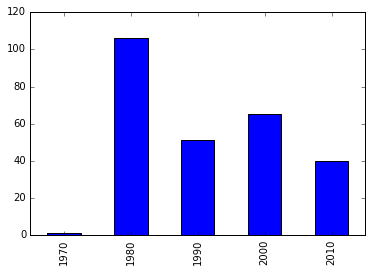

In [20]:
h=cast[cast.name=='Mammootty']
h.head()
(h.year//10*10).value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [21]:
h=cast
t = h[h.character.str.startswith('Patron in')]
t.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [22]:
h=cast
t = h[h.character.str.startswith('Science')]
t.character.value_counts().head(10)

Science Teacher         55
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

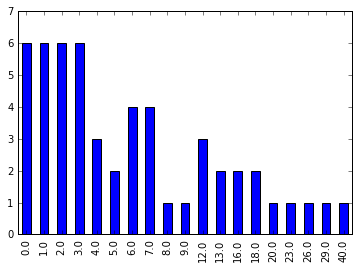

In [23]:
h=cast[cast.name=='Judi Dench']
h.n.fillna(0).value_counts().sort_index().plot(ylim=[0,7],kind='bar')

### Plot the n-values of Cary Grant's roles through his career.

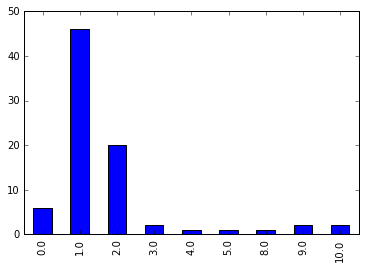

In [24]:
h=cast[cast.name=='Cary Grant']
h.n.fillna(0).value_counts().sort_index().plot(ylim=[0,50],kind='bar')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

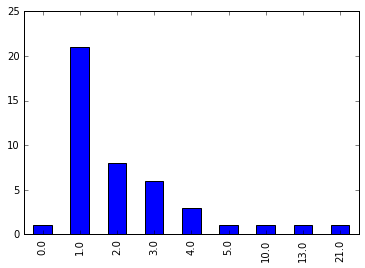

In [25]:
h=cast[cast.name=='Sidney Poitier']
h.n.fillna(0).value_counts().sort_index().plot(ylim=[0,25],kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [26]:
h=cast[cast.n==1]
h.head()

,title,year,name,type,character,n
88,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1
121,All Things Fall Apart,2011,50 Cent,actor,Deon,1
126,Freelancers,2012,50 Cent,actor,Malo,1
127,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1
128,Gun,2010,50 Cent,actor,Rich,1


In [27]:
h = h[ (h.type=='actor') 
     | (h.type=='actress')]
h = h[h.year//10*10==1950]
h
g = h.groupby(['type']).size()
g

type
actor      6440
actress    2861
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [28]:
h=cast[cast.n==2]
h.head()

,title,year,name,type,character,n
83,Big Apple,2002,Angel 11:11,actor,Angel,2
107,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2
300,Dhoni,2012,Aakash (IV),actor,Karthick Subramaniam,2
307,Inspiration Shines Through,2006,Antonio Aakeel,actor,Rishi,2
365,Ursula,1986,Petri Aalto,actor,Harri,2


In [32]:
h = h[ (h.type=='actor') 
     | (h.type=='actress')]
h = h[h.year//10*10==1950]
h
g = h.groupby(['type']).size()
g

type
actor      4433
actress    4444
dtype: int64